In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
train_df=pd.read_csv("train.csv")

In [51]:
train_df #ehhe

,Id,Therapy Hours,Initial Health Score,Lifestyle Activities,Average Sleep Hours,Follow-Up Sessions,Recovery Index
0,9255,5,49,No,7,5,36
1,1562,2,48,Yes,7,6,25
2,1671,2,81,No,7,2,59
3,6088,2,46,No,6,1,22
4,6670,8,47,No,9,0,40
...,...,...,...,...,...,...,...
7995,5735,8,50,Yes,6,6,48
7996,5192,4,68,No,9,3,51
7997,5391,9,48,No,7,6,44
7998,861,1,47,No,9,0,20


In [52]:
train_df.drop_duplicates(inplace=True)

In [53]:
train_df.shape

(8000, 7)

In [54]:
null_value_percentages = (train_df.isna().sum() / train_df.shape[0]) * 100
null_value_percentages

Id                      0.0
Therapy Hours           0.0
Initial Health Score    0.0
Lifestyle Activities    0.0
Average Sleep Hours     0.0
Follow-Up Sessions      0.0
Recovery Index          0.0
dtype: float64

In [55]:
train_df.columns

Index(['Id', 'Therapy Hours', 'Initial Health Score', 'Lifestyle Activities',
       'Average Sleep Hours', 'Follow-Up Sessions', 'Recovery Index'],
      dtype='object')

In [56]:
train_df['Lifestyle Activities']=train_df['Lifestyle Activities'].map({'Yes':1,'No':0})
train_df['Lifestyle Activities']

0       0
1       1
2       0
3       0
4       0
       ..
7995    1
7996    0
7997    0
7998    0
7999    0
Name: Lifestyle Activities, Length: 8000, dtype: int64

In [57]:
print(train_df.info())
print(train_df.head())
print(train_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Id                    8000 non-null   int64
 1   Therapy Hours         8000 non-null   int64
 2   Initial Health Score  8000 non-null   int64
 3   Lifestyle Activities  8000 non-null   int64
 4   Average Sleep Hours   8000 non-null   int64
 5   Follow-Up Sessions    8000 non-null   int64
 6   Recovery Index        8000 non-null   int64
dtypes: int64(7)
memory usage: 437.6 KB
None
     Id  Therapy Hours  Initial Health Score  Lifestyle Activities  \
0  9255              5                    49                     0   
1  1562              2                    48                     1   
2  1671              2                    81                     0   
3  6088              2                    46                     0   
4  6670              8                    47              

In [58]:
train_df=train_df.fillna(train_df.mean())

In [59]:
numerical_cols=train_df.select_dtypes(include=['int64','float64','float32']).columns
print(numerical_cols)

Index(['Id', 'Therapy Hours', 'Initial Health Score', 'Lifestyle Activities',
       'Average Sleep Hours', 'Follow-Up Sessions', 'Recovery Index'],
      dtype='object')


In [60]:
feature_cols = [col for col in train_df.columns if col not in ['Id', 'Recovery Index']]

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_scaled=train_df.copy()
df_scaled[feature_cols]=scaler.fit_transform(train_df[feature_cols])

In [61]:
print(df_scaled)

        Id  Therapy Hours  Initial Health Score  Lifestyle Activities  \
0     9255       0.006455             -1.183844             -0.989307   
1     1562      -1.149747             -1.241506              1.010808   
2     1671      -1.149747              0.661318             -0.989307   
3     6088      -1.149747             -1.356828             -0.989307   
4     6670       1.162658             -1.299167             -0.989307   
...    ...            ...                   ...                   ...   
7995  5735       1.162658             -1.126183              1.010808   
7996  5192      -0.378946             -0.088279             -0.989307   
7997  5391       1.548059             -1.241506             -0.989307   
7998   861      -1.535148             -1.299167             -0.989307   
7999  7271      -1.149747             -1.356828             -0.989307   

      Average Sleep Hours  Follow-Up Sessions  Recovery Index  
0                0.269888            0.134041              

In [62]:
print("Data Statistics:")
print(df_scaled.describe())

Data Statistics:
                 Id  Therapy Hours  Initial Health Score  \
count   8000.000000   8.000000e+03          8.000000e+03   
mean    5012.506875   2.842171e-17         -3.321787e-16   
std     2887.649416   1.000063e+00          1.000063e+00   
min        2.000000  -1.535148e+00         -1.702796e+00   
25%     2512.750000  -7.643465e-01         -8.522919e-01   
50%     5014.500000   6.455466e-03          2.704316e-02   
75%     7505.250000   7.772574e-01          8.919628e-01   
max    10000.000000   1.548059e+00          1.699221e+00   

       Lifestyle Activities  Average Sleep Hours  Follow-Up Sessions  \
count          8.000000e+03         8.000000e+03        8.000000e+03   
mean           5.151435e-17         1.367795e-16       -8.171241e-17   
std            1.000063e+00         1.000063e+00        1.000063e+00   
min           -9.893072e-01        -1.496494e+00       -1.613561e+00   
25%           -9.893072e-01        -9.076996e-01       -9.145204e-01   
50%       

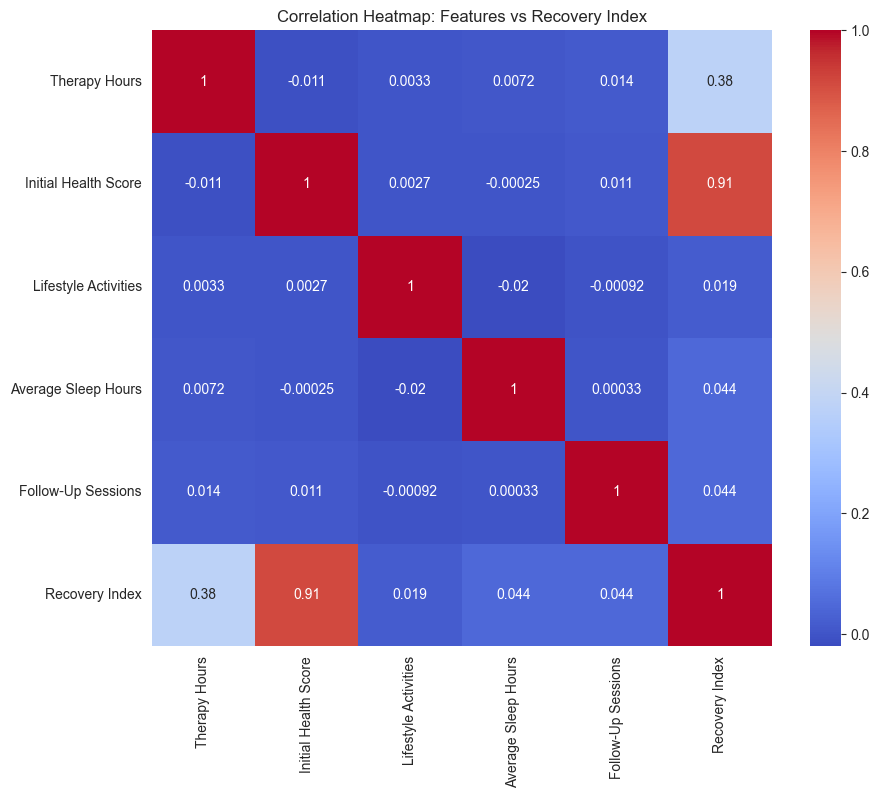

In [63]:
corr_cols = [col for col in df_scaled.columns if col != 'Id']
plt.figure(figsize=(10,8))
sns.heatmap(df_scaled[corr_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap: Features vs Recovery Index')
plt.show()

Generating histograms for numerical features...


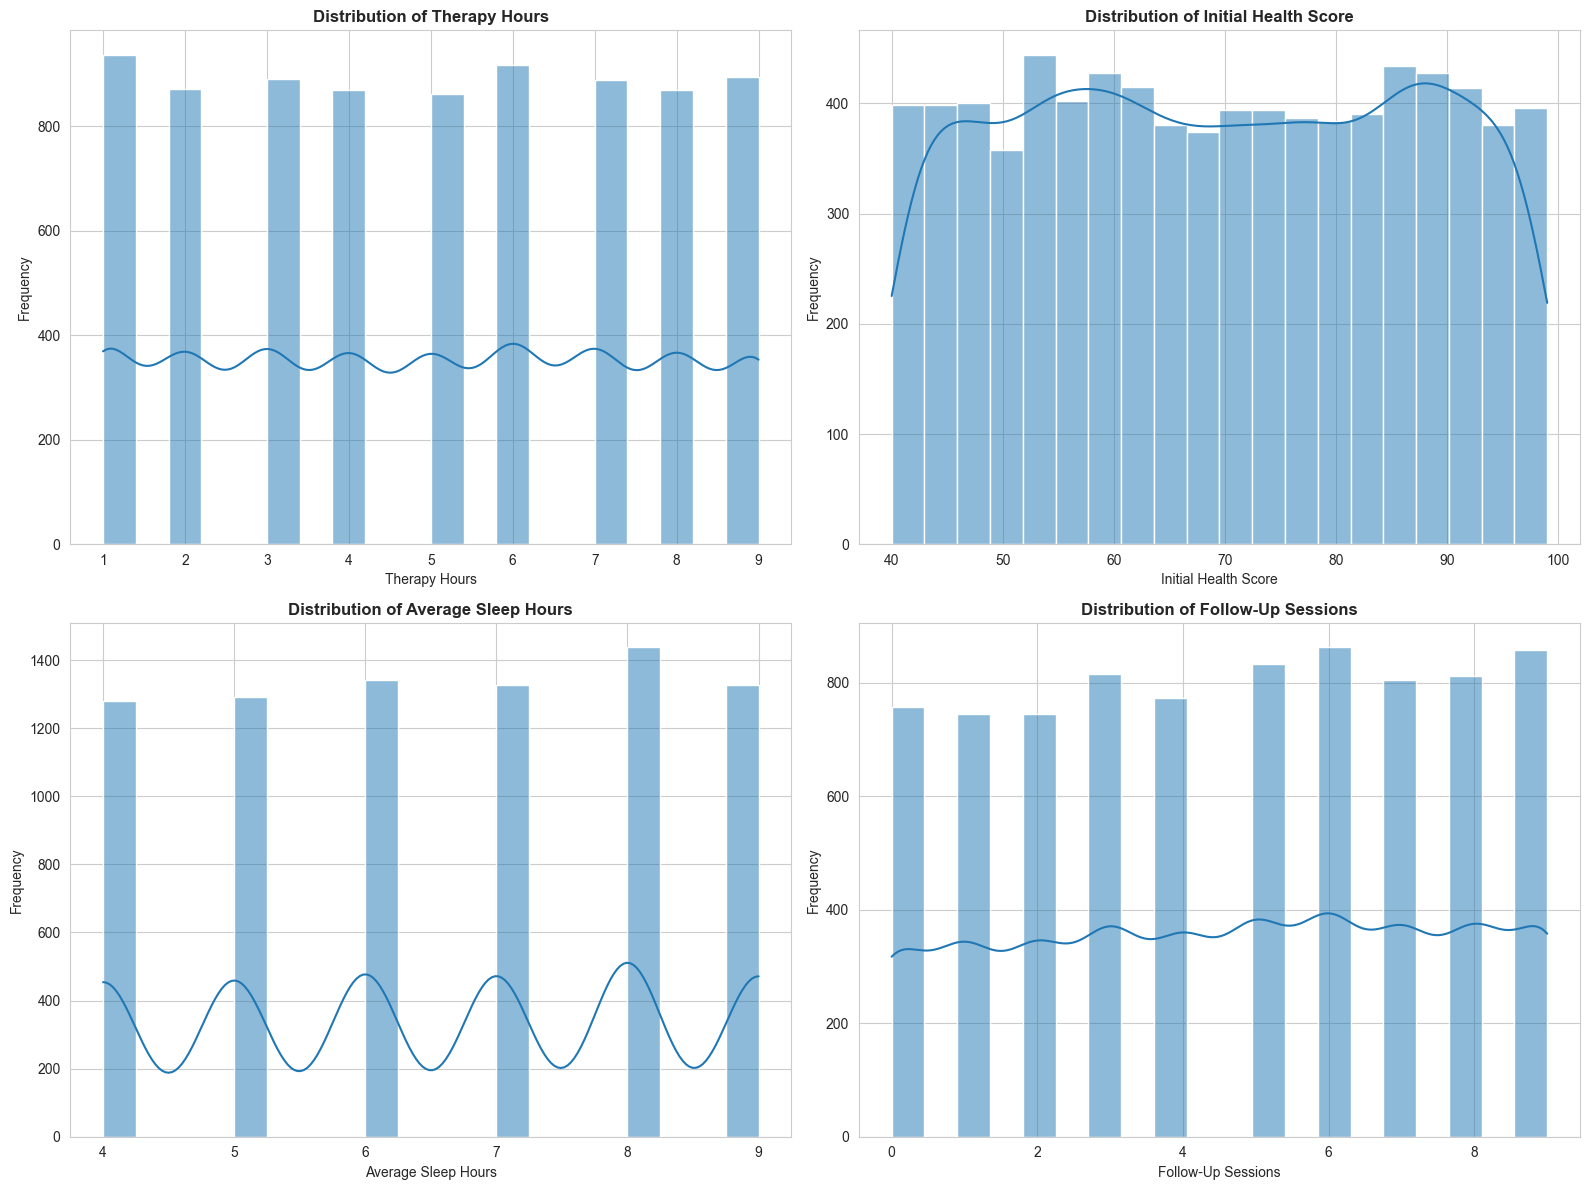

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Setup ---
# Set the visual style of the plots
sns.set_style("whitegrid")

# --- CORRECTION ---
# The numerical feature names must match the DataFrame's columns exactly (Title Case).
numerical_features = ['Therapy Hours', 'Initial Health Score', 'Average Sleep Hours', 'Follow-Up Sessions']

# --- Plotting ---
# Create a figure with a 2x2 grid of subplots.
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

# Flatten the 2x2 grid into a 1D array to make looping easier
axes = axes.flatten()

print("Generating histograms for numerical features...")

# Loop through each numerical feature and create a histogram
for i, col_name in enumerate(numerical_features):
    
    # Select the current subplot axis
    ax = axes[i]
    
    # Plot the histogram with a Kernel Density Estimate (KDE)
    sns.histplot(
        data=train_df,         # Your DataFrame is named train_df
        x=col_name,            # Use the correct (capitalised) column name
        kde=True,              # Add the smooth density curve
        ax=ax,                 # Specify which subplot to draw on
        bins=20                # You can adjust the number of bins
    )
    
    # Set a clear title for each subplot
    ax.set_title(f'Distribution of {col_name.title()}', fontweight='bold')
    ax.set_xlabel(col_name.title())
    ax.set_ylabel('Frequency')

# Clean up the layout so titles and labels don't overlap
plt.tight_layout()

# Save the figure to a file (optional, but good for your report)
plt.savefig('feature_histograms.png', dpi=300)

# Display the plots in the notebook
plt.show()

In [65]:
df_scaled.to_csv("processed_train.csv", index=False)